In [13]:
%matplotlib inline

#0.Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1.Import data & conf

In [15]:
wt_sales = pd.read_csv("Walmart_Sales.csv") 
#return the same random records
np.random.seed(0)

#2.Data cleaning

In [16]:
#Check missing values 
missing_values_count = wt_sales.isnull().sum()

total_cells = np.product(wt_sales.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

#Check duplicates
duplicates = wt_sales.duplicated()

In [17]:
#Check date format
date_cols = ["Date"]

wt_sales_date = pd.read_csv('Walmart_Sales.csv', parse_dates = date_cols)

#Create column 'Year'
wt_sales_date['Date'] = pd.to_datetime(wt_sales_date['Date'], format='%d-%m-%Y', errors='coerce')

wt_sales_date['Year'] = wt_sales_date['Date'].dt.year

#Create column 'Month'
wt_sales_date['Month'] = wt_sales_date['Date'].dt.month

#Create column 'Day'
wt_sales_date['Day'] = wt_sales_date['Date'].dt.day

#Create column 'Dayofweek'
wt_sales_date['Days_of_week'] = wt_sales_date['Date'].dt.dayofweek

#Create column 'Daysofweek's names'
wt_sales_date['Days_of_week_names'] = wt_sales_date['Date'].dt.day_name()

#Create column 'year's week'
#wt_sales_date['Year_of_week'] = wt_sales_date['Date'].dt.isocalendar().week

#Create column 'Quarter'
wt_sales_date['Quarter'] = wt_sales_date['Date'].dt.quarter

#Create column 'Name of month'
wt_sales_date['Name_of_month'] = wt_sales_date['Date'].dt.month_name()

AttributeError: 'NoneType' object has no attribute 'update'

<Figure size 720x432 with 0 Axes>

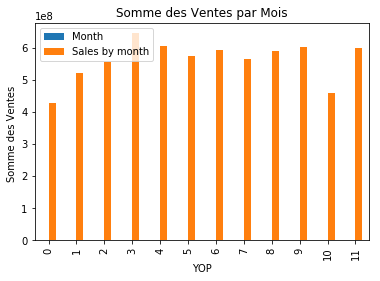

In [ ]:
#Create colummn 'Saison'
def get_saison(date):
    month = date.month
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8,9]:
        return 'summer'
    else:
        return 'automn'

wt_sales_date['Saison'] = wt_sales_date['Date'].apply(get_saison)

#Sales by month
monthly_sales = wt_sales_date.groupby('Month')["Weekly_Sales"].sum()
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ['Month', 'Sales by month']

#graphique
month_names = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Avr', 5: 'Mai', 6: 'Juin',
    7: 'Juil', 8: 'Aout', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

monthly_sales_df['Month'] = monthly_sales_df['Month'].map(month_names)

plt.close('all')
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_df['Month'], monthly_sales_df['Sales by month'])
plt.xlabel('Month')
y_ticks = range(0, int(monthly_sales_df['Sales by month'].max()) + 100000000, 100000000)
y_labels = [f'{y/1000000:.0f}M' for y in y_ticks]
plt.yticks(y_ticks, y_labels)

plt.title("Sales by month")

plt.show()


#Sales by days's week
#sales_by_days_week = wt_sales_date.groupby('Days_of_week')["Weekly_Sales"].sum()
#sales_by_days_week_df = sales_by_days_week.reset_index()
#sales_by_days_week_df.columns = ['Days_of_week', 'Sales by days of week']
#print(sales_by_days_week_df)

#Sales by days's week
sales_by_days_week = wt_sales_date.groupby('Days_of_week')["Weekly_Sales"].sum()
sales_by_days_week_df = sales_by_days_week.reset_index()
sales_by_days_week_df.columns = ['Days_of_week', 'Sales by days of week']
#print(sales_by_days_week_df)


